In [1]:
#Importando as bibliotecas necessárias
import pandas as pd
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Biblioteca para trabalhar com mapas
!pip install folium

In [3]:
#Carregando a base de dados:
dataset = pd.read_csv('2019--2-semestre.csv', sep=';', encoding='latin1')

In [4]:
dataset.head().T

,0,1,2,3,4
Região,NE,SE,SE,SE,NE
UF,PE,SP,SP,RJ,PE
Cidade,Petrolina,São Carlos,São Paulo,Rio de Janeiro,Recife
Sexo,M,F,M,F,M
Faixa Etária,entre 31 a 40 anos,entre 51 a 60 anos,entre 31 a 40 anos,entre 61 a 70 anos,entre 21 a 30 anos
Data Finalização,05/07/2019,03/07/2019,03/07/2019,02/07/2019,04/07/2019
Tempo Resposta,10,NaN,NaN,10,10
Nome Fantasia,Banco Bradesco,Azul Linhas Aéreas,Samsung,Tim,Vivo - Telefônica (GVT)
Segmento de Mercado,"Bancos, Financeiras e Administradoras de Cartão",Transporte Aéreo,"Fabricantes - Eletroeletrônicos, Produtos de ...","Operadoras de Telecomunicações (Telefonia, Int...","Operadoras de Telecomunicações (Telefonia, Int..."
Área,Serviços Financeiros,Transportes,Produtos de Telefonia e Informática,Produtos de Telefonia e Informática,Telecomunicações


In [5]:
#Pergunta 1: Qual o número de reclamações feitas por estado?
dataset.groupby('UF')['UF'].count()

UF
AC      1212
AL      2819
AM      3634
AP       593
BA     21097
CE     12583
DF     18117
ES     10549
GO     12893
MA      9875
MG     36872
MS      7503
MT      8286
PA      5015
PB      5749
PE     13304
PI      4418
PR     41880
RJ     36482
RN      2983
RO      1849
RR       698
RS     31627
SC     15949
SE      2512
SP    113024
TO      1868
Name: UF, dtype: int64

In [6]:
#Pergunta 2: Qual a quantidade de reclamações por sexo?
dataset['Sexo'].value_counts()

M    244566
F    178825
Name: Sexo, dtype: int64

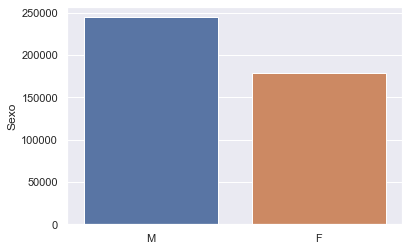

In [7]:
#Visualizando a quantidade de reclamações por sexo graficamente
sns.set(style='darkgrid')
sexo = dataset['Sexo'].unique()
cont = dataset['Sexo'].value_counts()
sns.barplot(x=sexo, y=cont)

In [8]:
#Averiguando a faixa etária de consumidores por sexo
dataset.groupby('Sexo')['Faixa Etária'].value_counts()

Sexo  Faixa Etária      
F     entre 31 a 40 anos    52440
      entre 21 a 30 anos    46660
      entre 41 a 50 anos    29622
      entre 51 a 60 anos    22432
      entre 61 a 70 anos    16386
      mais de 70 anos        7388
      até 20 anos            3897
M     entre 31 a 40 anos    84325
      entre 21 a 30 anos    72753
      entre 41 a 50 anos    39380
      entre 51 a 60 anos    21595
      entre 61 a 70 anos    14475
      mais de 70 anos        6591
      até 20 anos            5447
Name: Faixa Etária, dtype: int64

In [9]:
#Pergunta 3: Consumidores mais jovens contratam serviços pela internet?
df2 = dataset[dataset['Como Comprou Contratou']=='Internet']

In [10]:
df2

,Região,UF,Cidade,Sexo,Faixa Etária,Data Finalização,Tempo Resposta,Nome Fantasia,Segmento de Mercado,Área,Assunto,Grupo Problema,Problema,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Total
3,SE,RJ,Rio de Janeiro,F,entre 61 a 70 anos,02/07/2019,10.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Produtos de Telefonia e Informática,Aparelho celular,Contrato / Oferta,Oferta não cumprida / serviço não fornecido/ v...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
6,SE,RJ,Rio de Janeiro,F,entre 41 a 50 anos,01/07/2019,10.0,Extra.com,Comércio Eletrônico,Produtos de Telefonia e Informática,"Acessórios e periféricos (monitor, impressora,...",Cobrança / Contestação,Dificuldade / atraso na devolução de valores p...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,1
11,NE,BA,Morro do Chapéu,F,entre 61 a 70 anos,02/07/2019,10.0,Vivo - Telefônica (GVT),"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,Cobrança por serviço/produto não contratado / ...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
15,SE,RJ,Rio de Janeiro,F,entre 21 a 30 anos,05/07/2019,8.0,Casasbahia.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Eletroportáteis ( batedeira, liquidificador, u...",Atendimento / SAC,Má qualidade no atendimento (descortesia / des...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
16,SE,RJ,Rio de Janeiro,M,entre 21 a 30 anos,05/07/2019,8.0,Mercado Pago,Empresas de Pagamento Eletrônico,Serviços Financeiros,Serviço de pagamento online/ via celular/ maqu...,Contrato / Oferta,Dificuldade para rescindir o contrato / cancel...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423380,SE,MG,Itabira,F,entre 31 a 40 anos,30/12/2019,10.0,Casasbahia.com,Comércio Eletrônico,Produtos Eletrodomésticos e Eletrônicos,"Lavadora de roupa, louça e secadora",Entrega do Produto,Não entrega / demora na entrega do produto,Internet,S,S,Finalizada avaliada,Resolvida,3.0,1
423381,SE,RJ,Duque de Caxias,F,entre 21 a 30 anos,19/12/2019,0.0,Boa Vista Serviços - SCPC (Serviço Central de ...,Bancos de Dados e Cadastros de Consumidores,Serviços Financeiros,Banco de Dados e Cadastros de Consumidores (SP...,Informação,"Dados pessoais ou financeiros consultados, col...",Internet,N,S,Finalizada avaliada,Não Resolvida,3.0,1
423385,S,PR,São José do Ivaí,F,até 20 anos,24/12/2019,3.0,Mercado Livre,Empresas de Intermediação de Serviços / Negócios,Produtos de Telefonia e Informática,Aparelho celular,Saúde e Segurança,"Risco, dano físico ou mal estar decorrente da ...",Internet,S,S,Finalizada avaliada,Resolvida,4.0,1
423387,SE,SP,São Paulo,F,entre 31 a 40 anos,27/12/2019,3.0,Tim,"Operadoras de Telecomunicações (Telefonia, Int...",Telecomunicações,Telefonia Móvel Pré-paga,Cobrança / Contestação,"Negativação indevida (SPC, Serasa, SCPC etc)",Internet,S,S,Finalizada avaliada,Resolvida,4.0,1


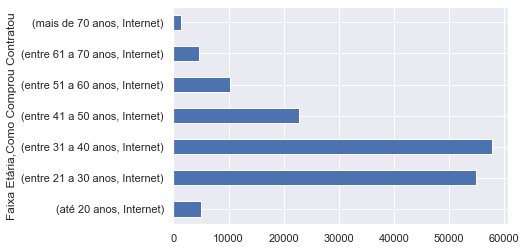

In [11]:
df2.groupby('Faixa Etária')['Como Comprou Contratou'].value_counts().plot.barh()

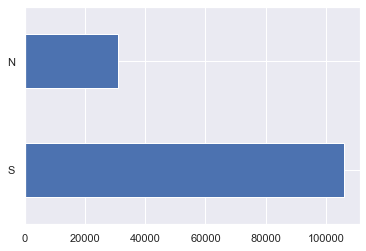

In [12]:
#Pergunta 4: Estes consumidores (entre 31 a 40 anos) 
#procuram a empresa antes de registrar uma reclamação?
df2 = dataset[dataset['Faixa Etária']=='entre 31 a 40 anos']
df2['Procurou Empresa'].value_counts().plot.barh()

In [13]:
#Pergunta 5: Qual o grupo de problema mais comum?
dataset['Grupo Problema'].value_counts()

Cobrança / Contestação    188636
Contrato / Oferta          80506
Vício de Qualidade         55901
Atendimento / SAC          48619
Informação                 31784
Entrega do Produto         15877
Saúde e Segurança           2068
Name: Grupo Problema, dtype: int64

In [14]:
dataset[dataset['Grupo Problema'] == 'Cobrança / Contestação']['Problema'].value_counts()

Cobrança indevida / abusiva para alterar ou cancelar o contrato                                           39060
Cobrança por serviço/produto não contratado / não reconhecido / não solicitado                            27370
Dificuldade / atraso na devolução de valores pagos / reembolso / retenção de valores                      22186
Renegociação / parcelamento de dívida                                                                     19788
Cobrança de tarifas, taxas, valores não previstos / não informados                                        15088
Cobrança após cancelamento do serviço                                                                     10562
Cálculo de juros, saldo devedor (contestação, solicitação de histórico, dúvidas)                           8743
Cobrança em duplicidade / Cobrança referente a pagamento já efetuado                                       8553
Cobrança por serviço não fornecido/ em desacordo com a utilização / fora do prazo                       

In [15]:
#Pergunta 6: Qual a quantidade de reclamações por segmento de mercado?
dataset['Segmento de Mercado'].value_counts()

Operadoras de Telecomunicações (Telefonia, Internet, TV por assinatura)    146839
Bancos, Financeiras e Administradoras de Cartão                            111728
Comércio Eletrônico                                                         33066
Bancos de Dados e Cadastros de Consumidores                                 27449
Transporte Aéreo                                                            24315
Empresas de Intermediação de Serviços / Negócios                            18298
Empresas de Pagamento Eletrônico                                            10882
Fabricantes - Eletroeletrônicos,  Produtos de Telefonia e Informática        8388
Energia Elétrica                                                             6737
Programas de Fidelidade                                                      5841
Corretoras e Sociedades de Seguros, Capitalização e Previdência              4774
Empresas de Recuperação de Crédito                                           3980
Agências de Viag

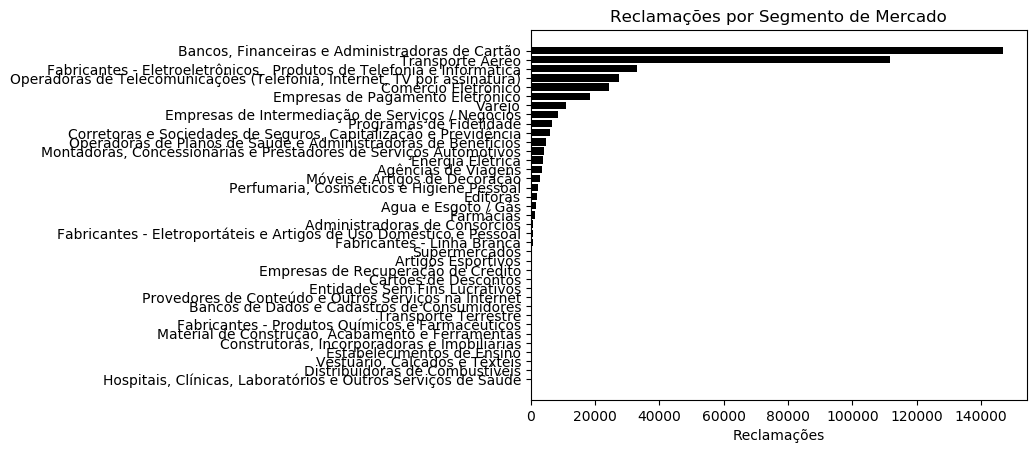

In [16]:
#Plotando graficamente essas informações

plt.style.use('ggplot')
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Segmento de Mercado'].value_counts()))
values = dataset['Segmento de Mercado'].value_counts()
segmentos = dataset['Segmento de Mercado'].unique()

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Reclamações por Segmento de Mercado')

plt.show()

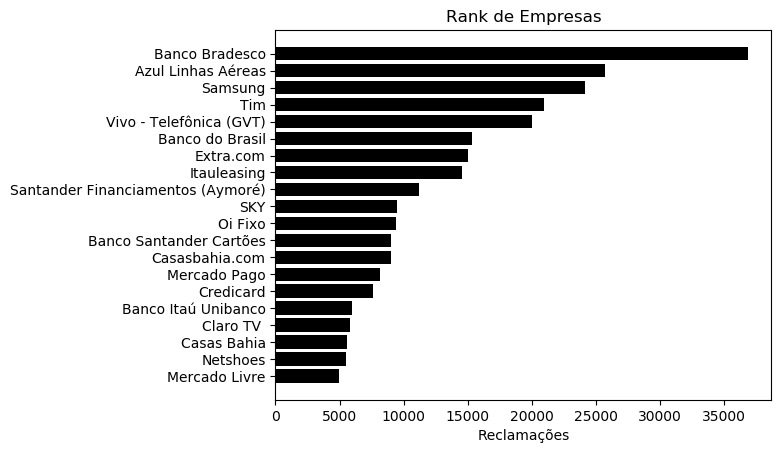

In [17]:
#Top 20 das empresas com mais reclamações

fig, ax = plt.subplots()

y_pos = np.arange(len(dataset['Nome Fantasia'].value_counts()[:20]))
values = dataset['Nome Fantasia'].value_counts()[:20]
segmentos = dataset['Nome Fantasia'].unique()[:20]

ax.barh(y_pos, values, align='center', color='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(segmentos)
ax.invert_yaxis()
ax.set_xlabel('Reclamações')
ax.set_title('Rank de Empresas')

plt.show()

In [18]:
#Pergunta 7: O tempo de resposta tem alguma correlação com a nota do consumidor?

df = dataset.drop('Total',axis=1)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Tempo Resposta,Nota do Consumidor
Tempo Resposta,1.000000,-0.054442
Nota do Consumidor,-0.054442,1.000000


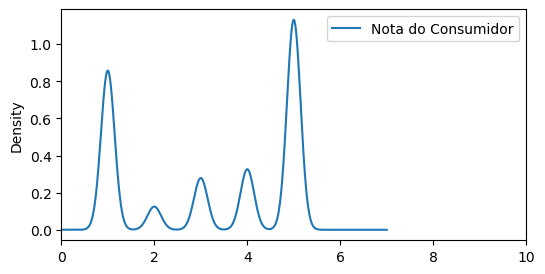

In [19]:
#Avaliando as notas dos consumidores

dataset.plot.density(y='Nota do Consumidor',xlim=[0,10],figsize=[6,3])

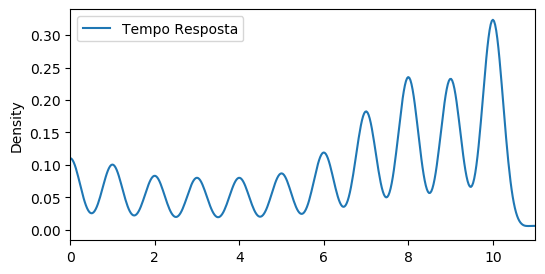

In [20]:
#Pergunta 8: Quantos dias a empresa leva para responder o cliente?

dataset.plot.density(y='Tempo Resposta',xlim=[0,11],figsize=[6,3])

In [21]:
#Proporção de reclamações registradas e não respondidas

x = dataset.groupby('Segmento de Mercado')['Segmento de Mercado'].count()

#Filtrando os segmentos de mercado com mais de 20 reclamações
x = x[x > 20]

df = dataset[dataset['Segmento de Mercado'].isin(x.keys())]
df = df[df['Avaliação Reclamação']=='Não Resolvida']
x1 = df.groupby('Segmento de Mercado')['Segmento de Mercado'].count()
x1

Segmento de Mercado
Administradoras de Consórcios                                                192
Agua e Esgoto / Gás                                                          563
Agências de Viagens                                                         1450
Artigos Esportivos                                                            38
Bancos de Dados e Cadastros de Consumidores                                 7558
Bancos, Financeiras e Administradoras de Cartão                            23245
Cartões de Descontos                                                          28
Comércio Eletrônico                                                         9348
Construtoras, Incorporadoras e Imobiliárias                                  125
Corretoras e Sociedades de Seguros, Capitalização e Previdência             1200
Distribuidoras de Combustíveis                                                57
Editoras                                                                      99
Empresas

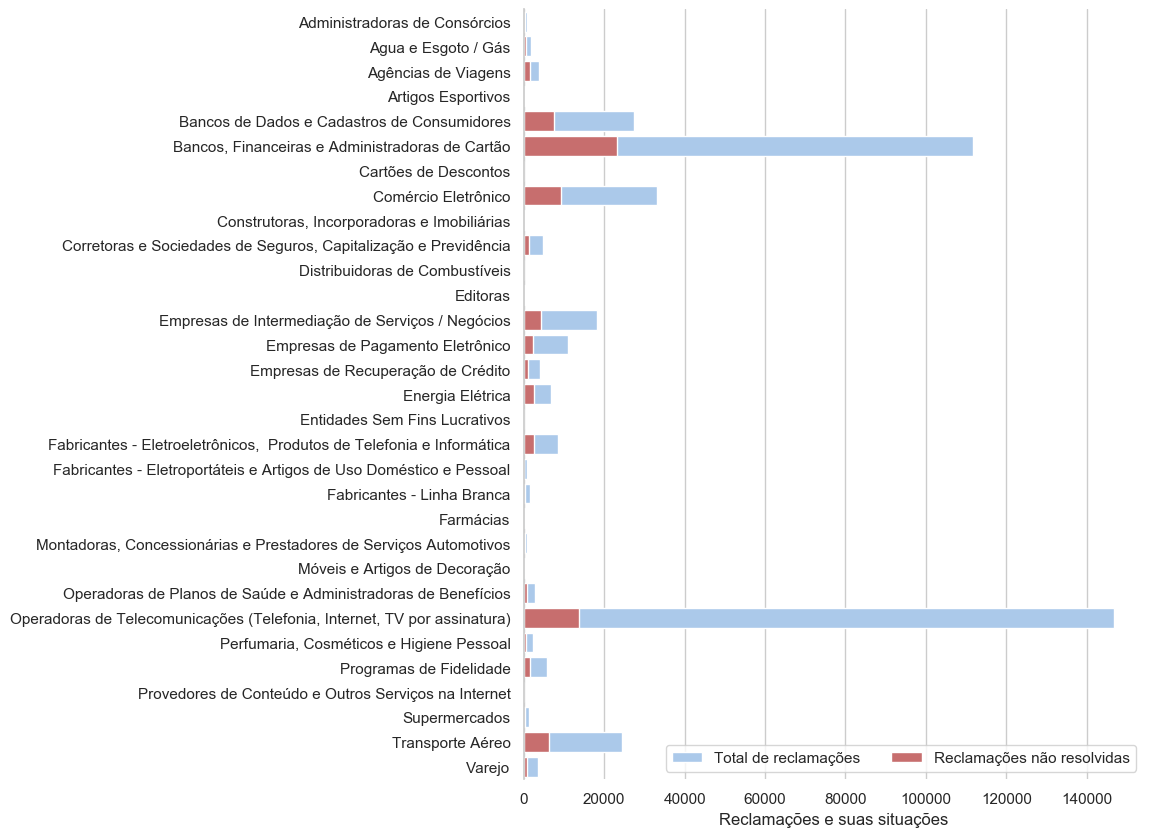

In [22]:
# Gráfico:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 10))

sns.set_color_codes("pastel")
sns.barplot(x=x.values, y=x.keys(), label="Total de reclamações", color="b")

sns.set_color_codes("muted")
sns.barplot(x=x1.values, y=x1.keys(),label="Reclamações não resolvidas", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="", xlabel="Reclamações e suas situações")
sns.despine(left=False, bottom=True)

In [23]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [24]:
import folium
import pandas as pd

In [25]:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=5)
folium.Marker([-19.9166813,-43.9344931]).add_to(mapa)
mapa

In [26]:
municipios = pd.read_excel('municipiosBrasil.xls',encoding='latin1')

In [27]:
# Tratamento dos dados:
import unicodedata
import re
def remover_acentos(txt):
    nfkd = unicodedata.normalize('NFKD', txt)
    palavraSemAcento = u"".join([c for c in nfkd if not unicodedata.combining(c)])

    # Usa expressão regular para retornar a palavra apenas com números, letras e espaço
    palavraSemAcento = re.sub('[^a-zA-Z0-9 \\\]', '', palavraSemAcento)
    palavraSemAcento = str(palavraSemAcento).upper()
    return palavraSemAcento

dataset['Cidade2'] = dataset['Cidade'].apply(remover_acentos)

In [28]:
from folium import plugins

# Especificando a localização, o valor de zoom e o tipo do mapa:
mapa = folium.Map(location=[-15.788497,-47.879873],zoom_start=0.5,tiles='Stamen Toner')
coordenadas=[]
# Limitando o número de registros para não travar a máquina:
for cid,uf in zip(dataset.Cidade2[:20000],dataset.UF[:20000]):
    cidadeUf = cid+' - '+uf
# Pegando os valores de longitude e latitude das duas bases:
    lat = municipios[municipios['Mun/UF'] == cidadeUf]['LATITUDE'].values
    long = municipios[municipios['Mun/UF'] == cidadeUf]['LONGITUDE'].values
    if lat != '' and long != '':
# Tratando os valores de lat e log:
        lat = float(str(lat).replace('[','').replace(']','').replace(' ',','))
        long = float(str(long).replace('[','').replace(']','').replace(' ',','))
        coordenadas.append([lat,long])
        
# Alimentando o mapa com as coordenadas fornecidas pelo código anterior:
mapa.add_child(plugins.HeatMap(coordenadas))        
mapa

C:\Users\NOTEBOOK\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if sys.path[0] == '':
C:\Users\NOTEBOOK\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if sys.path[0] == '':


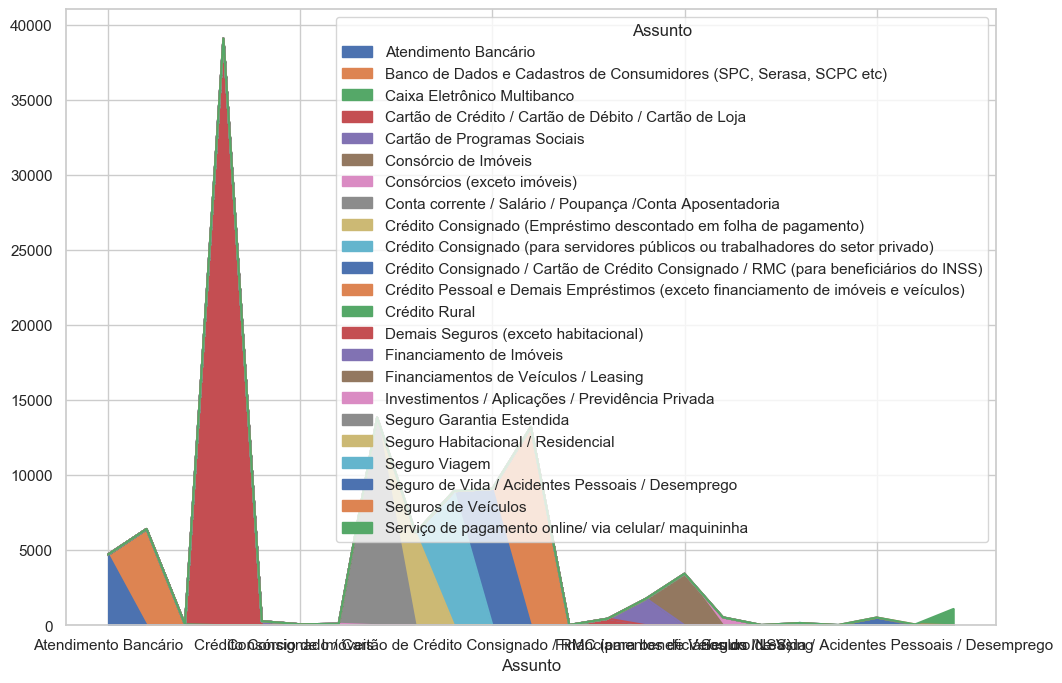

In [29]:
#Pergunta 9: Dentro das instituições financeiras quais são os serviços que possuem o maior número de reclamações?

# Filtrando por segmento de mercado:
df = dataset[dataset['Segmento de Mercado']==u'Bancos, Financeiras e Administradoras de Cartão']
df = df[df[u'Área']==u'Serviços Financeiros']

# Gráfico:
fig, ax = plt.subplots(figsize=(12,8))
df.groupby('Assunto')['Assunto'].value_counts().unstack().plot.area(ax=ax)